# Trabalho 2

Bibliotecas

In [12]:
import numpy as np
import matplotlib.pyplot as plt

Função para resolver o problema de uma dimensão

In [13]:
def deflexao_viga(L, P, E, I, N):
    dx = L / (N - 1)
    x = np.linspace(0, L, N)

    # Monta matriz A e vetor b
    A = np.zeros((N, N))
    b = np.zeros(N)

    # Montagem do sistema interno
    for i in range(1, N-1):
        A[i, i-1] = 1.0
        A[i, i]   = -2.0
        A[i, i+1] = 1.0

        # Momento fletor em cada ponto
        if x[i] < L/2:
            M = (P/2) * x[i]
        else:
            M = (P/2) * (L - x[i])

        b[i] = (M * dx**2) / (E * I)

    # Condições de contorno: y(0)=0, y(L)=0
    A[0, 0] = 1.0
    b[0] = 0.0
    A[-1, -1] = 1.0
    b[-1] = 0.0

    # Resolve sistema
    y = np.linalg.solve(A, b)

    return x, y


Parâmetros do problema

In [14]:
L = 10.0          # Comprimento da viga 
P = 10000.0       # Carga concentrada 
E = 200e9         # Módulo de elasticidade 
I = 5e-5          # Momento de inércia 
N = 50            # Número de nós

Obtem a resolução do sistema linear e o dominio de dimensão

In [15]:
x, y = deflexao_viga(L, P, E, I, N)

y

array([ 0.        , -0.00127498, -0.00254571, -0.00380794, -0.00505742,
       -0.0062899 , -0.00750113, -0.00868686, -0.00984284, -0.01096482,
       -0.01204855, -0.01308978, -0.01408427, -0.01502775, -0.01591599,
       -0.01674472, -0.01750971, -0.0182067 , -0.01883144, -0.01937968,
       -0.01984717, -0.02022967, -0.02052291, -0.02072266, -0.02082466,
       -0.02082466, -0.02072266, -0.02052291, -0.02022967, -0.01984717,
       -0.01937968, -0.01883144, -0.0182067 , -0.01750971, -0.01674472,
       -0.01591599, -0.01502775, -0.01408427, -0.01308978, -0.01204855,
       -0.01096482, -0.00984284, -0.00868686, -0.00750113, -0.0062899 ,
       -0.00505742, -0.00380794, -0.00254571, -0.00127498,  0.        ])

Plota a solução

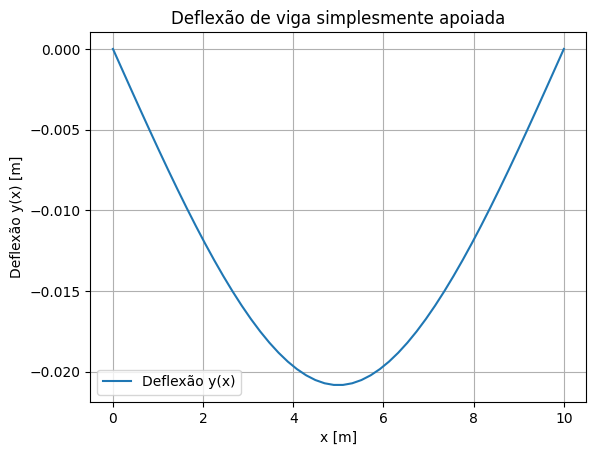

In [16]:
plt.plot(x, y, label="Deflexão y(x)")
plt.xlabel("x [m]")
plt.ylabel("Deflexão y(x) [m]")
plt.title("Deflexão de viga simplesmente apoiada")
plt.grid()
plt.legend()
plt.show()

Encontrando o melhor número de nós

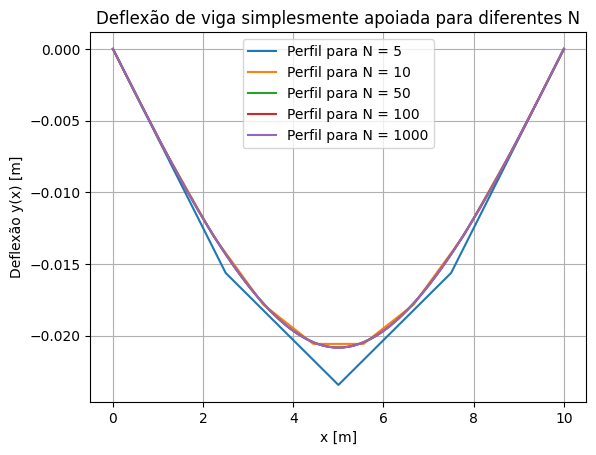

In [17]:
L = 10.0          # Comprimento da viga 
P = 10000.0       # Carga concentrada 
E = 200e9         # Módulo de elasticidade 
I = 5e-5          # Momento de inércia 

for N_val in [5, 10, 50, 100, 1000]:
    x, y = deflexao_viga(L, P, E, I, N_val)
    plt.plot(x, y, label=f'Perfil para N = {N_val}')

plt.xlabel("x [m]")
plt.ylabel("Deflexão y(x) [m]")
plt.title("Deflexão de viga simplesmente apoiada para diferentes N")
plt.grid()
plt.legend()
plt.show()


Testando diferentes parâmetros iniciais de comprimento

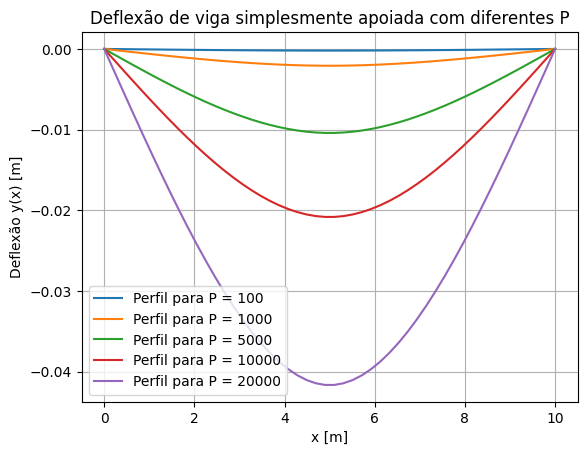

In [ ]:
L = 10.0         # Comprimento da viga 
E = 200e9         # Módulo de elasticidade 
I = 5e-5          # Momento de inércia 
N = 50            # Número de nós

for P_val in [100, 1000, 5000, 10000, 20000]:
    x, y = deflexao_viga(L, P_val, E, I, N)
    plt.plot(x, y, label=f'Perfil para P = {P_val}')

plt.xlabel("x [m]")
plt.ylabel("Deflexão y(x) [m]")
plt.title("Deflexão de viga simplesmente apoiada com diferentes Cargas")
plt.grid()
plt.legend()
plt.show()

Testando difentes parâmetros de módulo de elasticidade

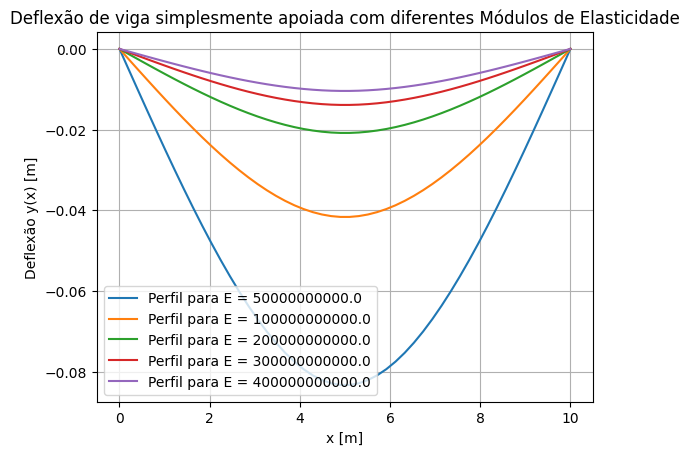

In [24]:
L = 10.0          # Comprimento da viga 
P = 10000.0       # Carga concentrada 
I = 5e-5          # Momento de inércia 
N = 50            # Número de nós

for E_val in [50e9, 100e9, 200e9, 300e9, 400e9]:
    x, y = deflexao_viga(L, P, E_val, I, N)
    plt.plot(x, y, label=f'Perfil para E = {E_val}')

plt.xlabel("x [m]")
plt.ylabel("Deflexão y(x) [m]")
plt.title("Deflexão de viga simplesmente apoiada com diferentes Módulos de Elasticidade")
plt.grid()
plt.legend()
plt.show()

Testando diferentes parâmetros de Momento de Inércia

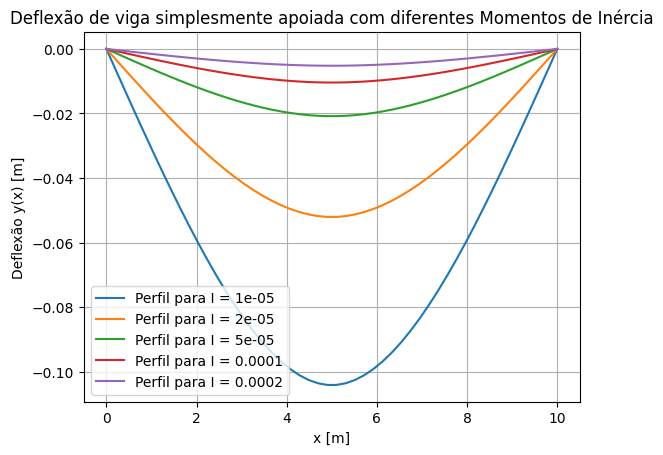

In [25]:
L = 10.0          # Comprimento da viga 
P = 10000.0       # Carga concentrada 
E = 200e9         # Módulo de elasticidade 
N = 50            # Número de nós

for I_val in [1e-5, 2e-5, 5e-5, 1e-4, 2e-4]:
    x, y = deflexao_viga(L, P, E, I_val, N)
    plt.plot(x, y, label=f'Perfil para I = {I_val}')

plt.xlabel("x [m]")
plt.ylabel("Deflexão y(x) [m]")
plt.title("Deflexão de viga simplesmente apoiada com diferentes Momentos de Inércia")
plt.grid()
plt.legend()
plt.show()